<a href="https://colab.research.google.com/github/nausheen53/SMAI/blob/master/q2_other_assi_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
from os import walk

In [0]:


image_names = []
for (dirpath, dirnames, filenames) in walk("/content/drive/My Drive/SMAI3/dataset"):
    image_names.extend(filenames)

In [65]:
labels=[]
for name in image_names:
    s=name.split('_')
    labels.append(s[0])
print(len(labels))

520


In [66]:
images=[]
for name in image_names:
    #images.append(cv2.imread('/home/nausheen/SMAI3/q1/dataset/'+name))
    img = cv2.imread('/content/drive/My Drive/SMAI3/dataset/'+name)
    print('Original Dimensions : ',img.shape)
    scale_percent = 60 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
    #cv2.imshow("Resized image", resized)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    print('grey dimensions : ',gray.shape)
    images.append(gray)
#     cv2.imshow("Resized image", gray)
#     cv2.waitKey(5000)
#     cv2.destroyAllWindows()

Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)


In [67]:
images=np.array(images, dtype=np.float64)
print(images.shape)
n_samples,h,w = images.shape

(520, 153, 153)


In [0]:

def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

In [0]:
def pca(X, n_pc):
    n_samples, n_features = X.shape
    print(n_samples)
    print("n features ")
    print(n_features)
    mean = np.mean(X, axis=0)
    centered_images = X-mean
    U, S, V = np.linalg.svd(centered_images)
    # U, S, V = np.linalg.svd(X)
    print("UUUUUUUUUUUUUUUU ")
    print(U)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_images

In [71]:
n_components = 517
X = images.reshape(n_samples, h*w)
print(X)
print(X.shape)
projected, components, mean, centered_images = pca(X,n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
# print("eigen faces ka size ",eigenfaces.shape)
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w,10,10) 

[[136. 136. 137. ...  80.  69.  63.]
 [149. 150. 151. ...  55. 111. 141.]
 [145. 149. 152. ... 174. 188. 192.]
 ...
 [ 40.  35.  28. ... 121. 110. 103.]
 [125. 125. 126. ...  74.  75.  76.]
 [198. 200. 195. ... 127. 140. 159.]]
(520, 23409)
520
n features 
23409
UUUUUUUUUUUUUUUU 
[[-4.19032663e-02 -2.17952987e-02 -3.11560999e-02 ...  1.55654503e-03
  -4.38528444e-02  7.04653894e-05]
 [ 4.80228883e-02  2.04325438e-02 -2.15174496e-02 ... -6.56735267e-04
  -4.38528444e-02  7.04653894e-05]
 [ 4.32049993e-02  4.65486195e-02 -2.66313128e-02 ... -1.19203199e-03
  -4.38528444e-02  7.04653894e-05]
 ...
 [-1.20285848e-01  5.25529298e-02  2.92791882e-03 ... -1.03787446e-04
  -4.38528444e-02  7.04653894e-05]
 [-7.60420842e-02 -2.44657308e-02 -3.57601815e-02 ... -9.60409408e-04
  -4.38528444e-02  7.04653894e-05]
 [ 5.08416741e-02 -9.25114641e-03 -2.01648257e-02 ... -3.40465023e-03
  -4.38528444e-02  7.04653894e-05]]


ValueError: ignored

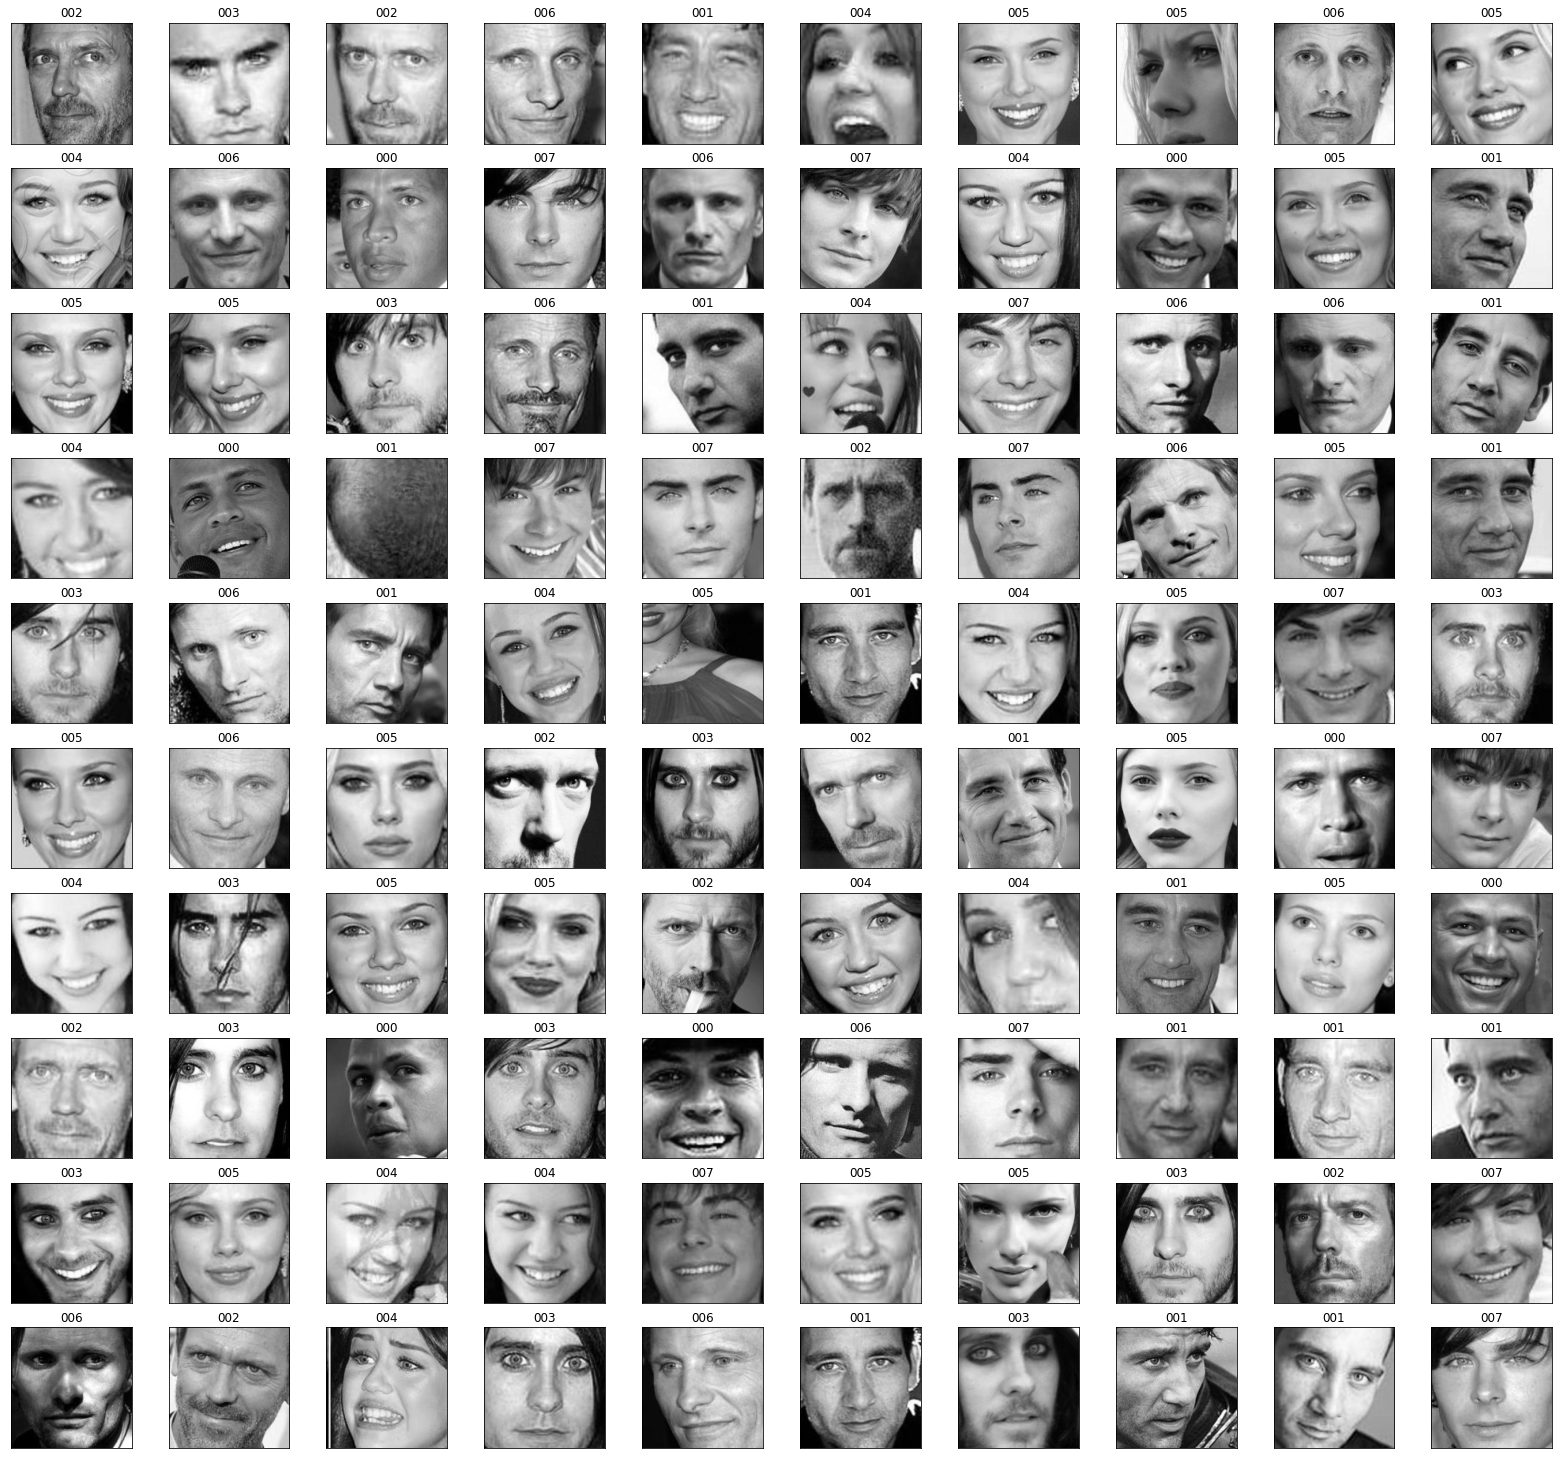

In [72]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
recover = np.asarray(recovered_images)
plot_portraits(recovered_images, labels, h, w, n_row=10, n_col=10)

In [73]:
print(recover.shape)

(520, 153, 153)


In [75]:
import pandas as pd
recover_img =[]

for i in recover :
  recover_img.append(i.flatten())
print(len(recover_img))
print(len(recover_img[0]))
data = pd.DataFrame(recover_img)
data['label']=labels
train=data.sample(frac=0.8,random_state=200) #random state is a seed value
validation=data.drop(train.index)
y_train = train['label']
y_validation = validation['label']
tr1 =train.drop('label',axis=1)
va1 =validation.drop('label',axis=1)
x_train = tr1
x_validation = va1
print((x_train).shape)
print((y_train).shape)
print((x_validation).shape)
print((y_validation).shape)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_validation = x_validation.to_numpy()
y_validation = y_validation.to_numpy()
print(type(x_train))

520
23409
(416, 23409)
(416,)
(104, 23409)
(104,)
<class 'numpy.ndarray'>
520
23409
(416, 23409)
(416,)
(104, 23409)
(104,)
<class 'numpy.ndarray'>


In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [0]:
def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    cost = 1 / m * np.sum(
        -y * np.log(h) - (1 - y) * np.log(1 - h)
    )
    grad = 1 / m * ((y - h) @ x)
    return cost, grad

In [0]:
def fit(x, y, max_iter=1000, alpha=0.1):
    print(x.shape)
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
#     print("classes ",classes)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
#         print("binary_y ",binary_y)
        
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad
            
        thetas.append(theta)
    return thetas, classes, costs

In [0]:
def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoid(xi @ theta) for theta in thetas]
    ) for xi in x]
    print("preds ",preds)
    return [classes[p] for p in preds]

In [80]:
thetas, classes, costs = fit(x_train, y_train)

(416, 23409)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [81]:
def score(classes, theta, x, y):
    return (predict(classes, theta, x) == y).mean()

print(f"Train Accuracy: {score(classes, thetas, x_train, y_train):.3f}")
print(f"Test Accuracy: {score(classes, thetas, x_validation, y_validation):.3f}")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


preds  [7, 0, 3, 1, 0, 3, 6, 0, 2, 0, 4, 1, 7, 5, 3, 0, 6, 6, 3, 0, 4, 2, 5, 4, 3, 4, 1, 1, 3, 3, 0, 1, 6, 3, 7, 3, 2, 7, 2, 0, 0, 5, 2, 4, 7, 1, 5, 7, 6, 0, 2, 5, 7, 2, 1, 2, 4, 3, 1, 2, 7, 1, 0, 0, 1, 4, 6, 7, 4, 3, 4, 5, 6, 5, 0, 0, 0, 6, 6, 2, 5, 4, 7, 0, 4, 3, 0, 4, 3, 7, 7, 0, 4, 2, 2, 7, 5, 7, 3, 1, 6, 3, 3, 1, 0, 6, 2, 0, 7, 7, 0, 2, 3, 2, 3, 6, 4, 6, 2, 0, 4, 0, 0, 1, 2, 1, 3, 6, 3, 7, 2, 7, 5, 2, 5, 0, 7, 5, 5, 1, 6, 3, 1, 4, 6, 6, 1, 2, 2, 6, 5, 2, 5, 5, 5, 1, 6, 6, 3, 2, 0, 1, 2, 2, 4, 7, 5, 1, 1, 3, 7, 3, 6, 5, 7, 3, 1, 7, 5, 4, 3, 2, 5, 3, 5, 7, 1, 7, 7, 6, 0, 3, 2, 3, 1, 7, 4, 0, 3, 1, 0, 5, 1, 3, 6, 7, 1, 3, 6, 3, 5, 3, 3, 6, 0, 3, 3, 3, 4, 7, 2, 0, 6, 1, 1, 2, 2, 1, 0, 3, 2, 0, 3, 5, 4, 4, 3, 3, 3, 1, 0, 3, 5, 0, 0, 7, 5, 2, 2, 2, 2, 0, 7, 6, 4, 6, 6, 2, 2, 3, 1, 6, 5, 5, 3, 1, 0, 0, 7, 4, 5, 1, 4, 5, 6, 4, 0, 2, 4, 0, 1, 4, 4, 4, 7, 6, 1, 5, 5, 0, 4, 5, 7, 7, 7, 2, 1, 5, 1, 7, 7, 7, 1, 4, 4, 6, 7, 2, 5, 0, 1, 4, 2, 3, 3, 7, 4, 1, 4, 1, 2, 6, 2, 4, 3, 7, 0, 4, 7, 0, 6,